In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
path = "../data/steel_rebar.csv"
TRAIN_PERC = 1
SIZE = 60

df = pd.read_csv(path, parse_dates=["Date"], index_col="Date").sort_index()
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-11-24,337.00,337.00,337.00,337.00,NaN,-0.30%
2015-11-25,335.00,335.00,335.00,335.00,NaN,-0.59%
2015-11-26,334.00,334.00,334.00,334.00,NaN,-0.30%
2015-11-27,334.00,334.00,334.00,334.00,NaN,0.00%
2015-11-30,341.33,341.33,341.33,341.33,NaN,2.19%
...,...,...,...,...,...,...
2025-07-30,539.50,539.50,539.50,539.50,0.10K,0.65%
2025-07-31,545.00,545.00,545.00,545.00,0.01K,1.02%
2025-08-01,545.00,545.00,545.00,545.00,0.01K,0.00%


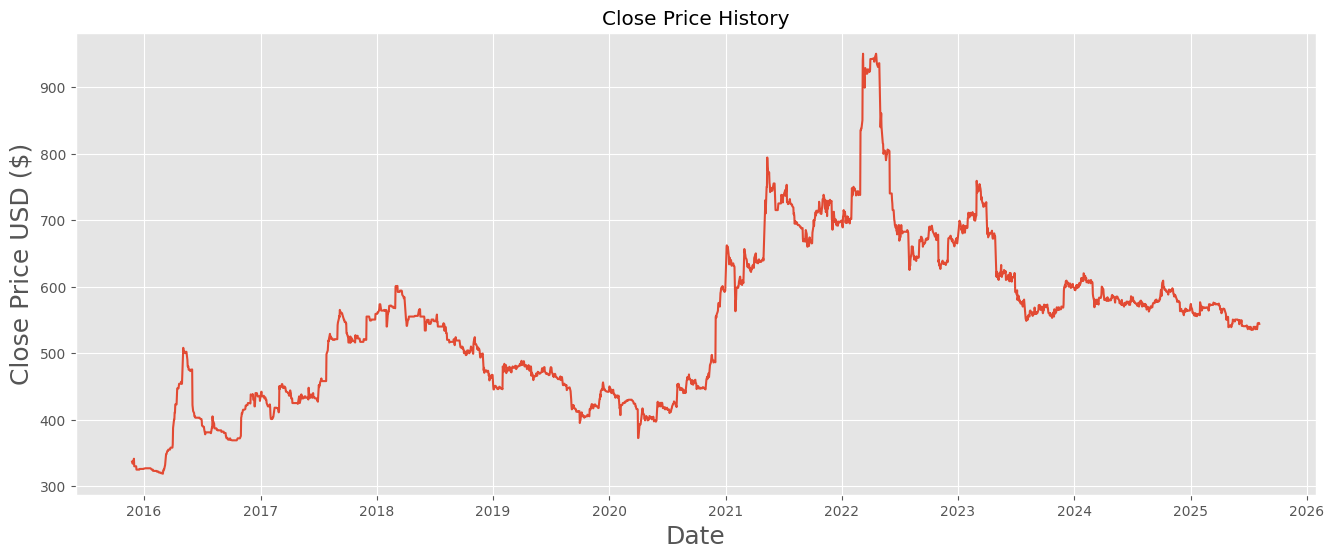

In [66]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [67]:
from sklearn.preprocessing import MinMaxScaler

data = df.filter(['Price'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * TRAIN_PERC ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02881858],
       [0.02564996],
       [0.02406565],
       ...,
       [0.35835485],
       [0.35914701],
       [0.35677054]])

In [68]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(SIZE, len(train_data)):
    x_train.append(train_data[i-SIZE:i, 0])
    y_train.append(train_data[i, 0])
    if i<= SIZE+1:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02881858, 0.02564996, 0.02406565, 0.02406565, 0.03567864,
       0.01772842, 0.01772842, 0.01772842, 0.01772842, 0.01772842,
       0.00980687, 0.00980687, 0.00980687, 0.00980687, 0.00980687,
       0.00980687, 0.00980687, 0.00980687, 0.01139118, 0.01139118,
       0.01139118, 0.01139118, 0.01139118, 0.01139118, 0.01139118,
       0.01199322, 0.01297549, 0.01297549, 0.01297549, 0.01297549,
       0.01297549, 0.01297549, 0.01297549, 0.01297549, 0.01297549,
       0.01297549, 0.01297549, 0.01297549, 0.01297549, 0.01297549,
       0.01218334, 0.00980687, 0.00980687, 0.00980687, 0.00980687,
       0.00692343, 0.00663825, 0.00663825, 0.00663825, 0.00663825,
       0.00663825, 0.00663825, 0.00663825, 0.00505395, 0.00505395,
       0.00505395, 0.00505395, 0.00346964, 0.00267748, 0.00267748])]
[0.0026774822161315104]

[array([0.02881858, 0.02564996, 0.02406565, 0.02406565, 0.03567864,
       0.01772842, 0.01772842, 0.01772842, 0.01772842, 0.01772842,
       0.00980687, 0.00980687, 0.

In [69]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/Users/kaslisk/.pyenv/versions/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2387/2387 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - loss: 0.0026


In [ ]:
test_data = scaled_data[training_data_len - SIZE: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(SIZE, len(test_data)):
    x_test.append(test_data[i-SIZE:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [77]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2025-08-06 13:53:06.016633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


ValueError: math domain error

In [76]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')

plt.show()

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series